## Muhammad Abdur Rahman - BSCS18034
## Assignment 2
### Hough Transform


In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

uint8 (681, 1024, 3)


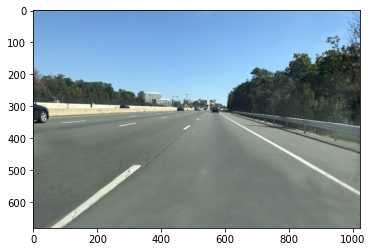

In [2]:
im1_str = 'test/test2.jpg'
img1 = plt.imread(im1_str)

print(img1.dtype, img1.shape)
plt.imshow(img1)

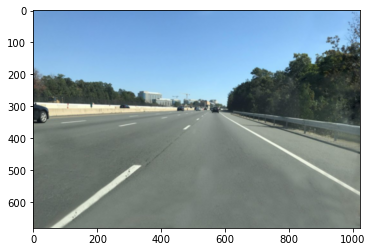

In [3]:
plt.imshow(cv2.GaussianBlur(img1,(5,5),0))

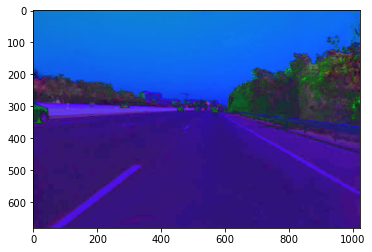

In [4]:
hsv_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

plt.imshow(hsv_img1)

In [5]:
gaussFilt1 = cv2.GaussianBlur(hsv_img1,(3,3),0)

im1_str

'test/test2.jpg'

## for different mask

##### I have seen this implementation online where RGB threshold is used to detect white lines and (HLS , RGB) combined are used for yellow lines. It increases the efficency of filter

In [6]:
img = img1.copy()
def bin_it(img, threshold):
    image = img.copy()
    
    assert len(image.shape) == 2, 'Image received has more than one channel'
    
    output_bin = np.zeros_like(image)
    output_bin[(image >= threshold[0]) & (image <= threshold[1])]=1
    return output_bin

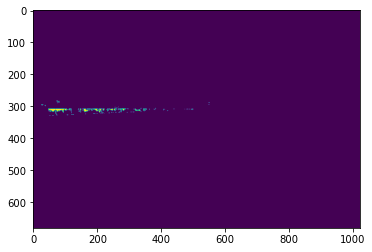

In [7]:
# convert image to hls colour space
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    
bin_thresh = [20, 255]

# hls thresholding for yellow
lower = np.array([20,120,80],dtype = "uint8")
upper = np.array([45, 200, 255],dtype = "uint8")
mask = cv2.inRange(hls, lower, upper)
hls_y = cv2.bitwise_and(img, img, mask = mask).astype(np.uint8)
hls_y = cv2.cvtColor(hls_y, cv2.COLOR_HLS2RGB)
hls_y = cv2.cvtColor(hls_y, cv2.COLOR_RGB2GRAY)
hls_y = bin_it(hls_y, bin_thresh)

plt.imshow(hls_y)

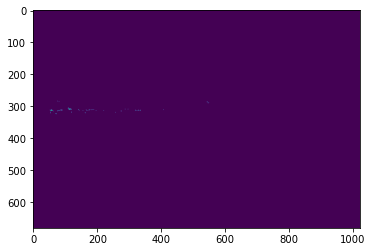

In [8]:
# rgb thresholding for yellow
lower = np.array([225,180,0],dtype = "uint8")
upper = np.array([255, 255, 170],dtype = "uint8")
mask = cv2.inRange(img, lower, upper)
rgb_y = cv2.bitwise_and(img, img, mask = mask).astype(np.uint8)
rgb_y = cv2.cvtColor(rgb_y, cv2.COLOR_RGB2GRAY)
rgb_y = bin_it(rgb_y, bin_thresh)

plt.imshow(rgb_y)

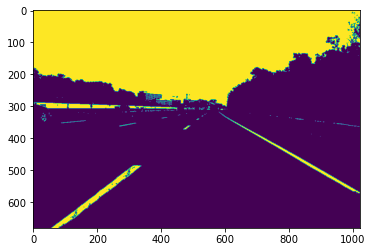

In [9]:
# rgb thresholding for white (best)
lower = np.array([100,100,200],dtype = "uint8")
upper = np.array([255, 255, 255],dtype = "uint8")
mask = cv2.inRange(img, lower, upper)
rgb_w = cv2.bitwise_and(img, img, mask = mask).astype(np.uint8)
rgb_w = cv2.cvtColor(rgb_w, cv2.COLOR_RGB2GRAY)
rgb_w = bin_it(rgb_w, bin_thresh)

plt.imshow(rgb_w)

In [10]:
im = np.zeros_like(hls_y)
im[(rgb_y == 1)|(rgb_w==1)|(hls_y==1)]  =  1
# img1 = im.copy()

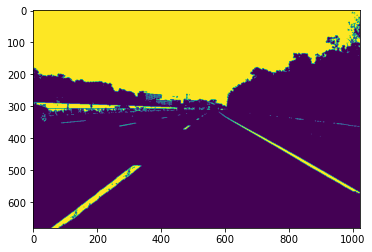

In [11]:
# output1 = threshold_colours(img1)

plt.imshow(im)

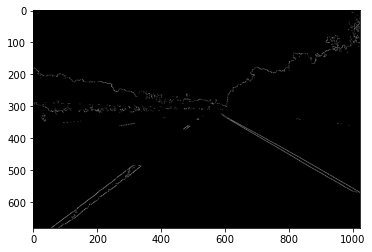

In [12]:
edges1 = cv2.Canny(im,5,5)

plt.imshow(edges1, cmap='gray')

In [13]:
## Finding All indexes with value 255

In [14]:
print([index for index, value in enumerate(edges1[400]) if value == 255])

[714, 715, 726, 727]


In [15]:
def toShowRoi(image):
    #cut first 1/ratio_irrelevent half of the graph little more than 1/2
    ratio_irrelevent = 1.7
    percentage_of_opp_side = 10       # that is 1/5 of the total width of image
    img = image.copy()
    
    xch = int(round(len(img[0])/percentage_of_opp_side)) # for one half
    decrement = ( (len(img[0])/2 - xch)/ (len(img) - len(img)/ratio_irrelevent) )
    print(decrement)
    
    print(type(xch))
    for i in range(0, len(img)):
        
        if(i < round(len(img)/ratio_irrelevent)):
            for j in range(0, len(img[i])):
                img[i][j] = 0
        else:
            if(xch < round(len(img[i])/2) - round(decrement+1)):
                xch = xch + decrement
           
            lowerLimit = round( len(img[i])/2 - xch)
            upperLimit = round( len(img[i])/2 + xch)
           
            for j in range(0, lowerLimit):
                    img[i][j] = 0
            for j in range(upperLimit, len(img[i])):
                    img[i][j] = 0
            img[i][lowerLimit] = 255
            img[i][upperLimit] = 255
        
        
        
    return img
        


1.4621355149989512
<class 'int'>


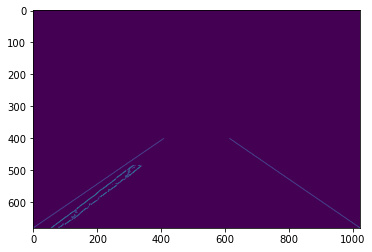

In [16]:
plt.imshow(toShowRoi(edges1))

In [17]:
def ROI(image):
    
    ratio_irrelevent = 1.7
    percentage_of_opp_side = 10       
    img = image.copy()
    
    xch = round(len(img[0])/percentage_of_opp_side)
    
    decrement = (len(img[0])/2 - xch)/ (len(img) - len(img)/ratio_irrelevent)
    
    for i in range(0, len(img)):
        
        if(i < round(len(img)/ratio_irrelevent)):
            for j in range(0, len(img[i])):
                img[i][j] = 0
        else:
            if(xch < round(len(img[i])/2) - round(decrement+1)):
                xch = xch + decrement
                
            lowerLimit = round( len(img[i])/2 - xch)
            upperLimit = round( len(img[i])/2 + xch)
           
            for j in range(0, lowerLimit):
                    img[i][j] = 0
            for j in range(upperLimit, len(img[i])):
                    img[i][j] = 0
    return img
        

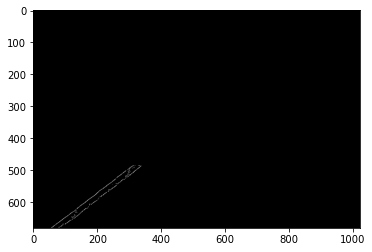

In [18]:
ROI_1 = ROI(edges1)
plt.imshow(ROI_1, cmap='gray')

In [19]:
print(math.cos(math.pi*(1/3)))

0.5000000000000001


In [20]:
def houghTransform(image, threshold):
    img = image.copy()
    arr = []
    
    for i in range(0, len(img)):
        arr.append([index for index, value in enumerate(img[i]) if value == 255])
    

   
    A = np.zeros((91, round(math.sqrt(len(img)**2 + len(img[0])**2))))

    for x in range(0, len(img)):
        if(len(arr[x]) > 0):

            for y in range(len(arr[x]) - 1):
                for angle in range(90):
                    RHO = x*math.cos(2*math.pi*(angle/360)) + arr[x][y]*math.sin(2*math.pi*(angle/360)) 


                    A[angle][round(RHO)] += 1

   
    
    print('threshold is: ', threshold)
    print('angle\t RHO\t intersections')
    for i in range(len(A) - 1):
        for j in range(len(A[i]) - 1):
            if(A[i][j] > threshold):
                print(i, '\t', j, '\t', A[i][j])
    
                
                
    

In [21]:
houghTransform(ROI_1,50)



threshold is:  50
angle	 RHO	 intersections
35 	 588 	 56.0
36 	 577 	 51.0
36 	 579 	 58.0
36 	 581 	 55.0
36 	 583 	 82.0
37 	 576 	 79.0
37 	 577 	 138.0
37 	 578 	 88.0
38 	 572 	 53.0
38 	 573 	 99.0
38 	 574 	 118.0
39 	 572 	 55.0


In [22]:







def HoughTransform(cannyedge, threshold_count, local_maxima_range):
    if (local_maxima_range % 2) == 0:
        print("Enter an odd size")
        return None
    
    height = len(cannyedge)
    width = len(cannyedge[0])
    diagonalsize = round(math.sqrt(height**2 + width**2))
#     print("Diagonal size: ")
#     print(diagonalsize)
    
    half_height = round(height/2)
    half_width = round(width/2)
    dsize = (diagonalsize*2)+1
    maxangle = 360
    
    accumulator = np.zeros((maxangle, dsize))
    waveimg = np.zeros((dsize, maxangle))
    lines = []
    points = []

    # Accumulating Peaks
    for i in range(height):
        for j in range(width):
            if cannyedge[i][j] == 255:
                for theta in range(len(accumulator)):
                    # j is x
                    # i is y                
                    currentrho = (j*math.cos(theta)) + (i*math.sin(theta))
#                     print(currentrho)
                    accumulator[round(theta), round(currentrho+diagonalsize+1)] += 1
                    waveimg[round(currentrho+diagonalsize+1), round(theta)] = 255
                
     
    half = int(local_maxima_range/2)
    suppressed = False
    
    # Finding Local Extrema
    
    for i in range(len(accumulator)):
        for j in range(len(accumulator[0])):            
            if accumulator[i][j] > 0:
                suppressed = False
                for k in range(-half, half):
                    for l in range(-half, half):
                        if (i+k) < maxangle and (i+k) >= 0 and (j+l) >= 0 and (j+l) < dsize:
                            if accumulator[i+k][j+l] > accumulator[i][j]:
                                accumulator[i][j] = 0
                                suppressed = True
                        if suppressed is True:
                            break
                    if suppressed is True:
                            break     
                            
                    
    for theta in range(len(accumulator)):
        for rho in range(len(accumulator[0])):
            if accumulator[theta][rho] >= threshold_count:
#                 print(rho-diagonalsize-1)
                a = math.cos(theta)
                b = math.sin(theta)
                rho -= (diagonalsize-1)
#                 if rho > (diagonalsize):
#                     rho = rho/2

                x0 = (a * (rho+1))
                y0 = (b * (rho+1))
                
                
                
                x1 = round(x0 + 1000 * (-b))
                y1 = round(y0 + 1000 * (a))
                x2 = round(x0 - 1000 * (-b))
                y2 = round(y0 - 1000 * (a))
                m = (y2-y1)/(x2-x1)
                
                
                c = y0-m*x0
                y1 = len(cannyedge)
                x1 = round((y1-c)/m)
                y2 = round(len(cannyedge)/2+100)
                x2 = round((y2-c)/m)
                
                print("RHO, ACCUM, Theta, slope")
                print(rho)
                print(accumulator[theta][rho])
                print(theta)
                print(m)
                print([[x0, y0], [x1, y1], [x2, y2]])
                
                if abs(x1) > diagonalsize or abs(y1) > diagonalsize or abs(y2) > diagonalsize or abs(x2) > diagonalsize:
                    print(f"Skipped: x1, y1, x2, y2: {[[x1, y1], [x2, y2]]}")
                
                lines.append([x1, y1, x2, y2, x0, y0])
                
    return lines, waveimg

In [23]:

lines, waveimg = HoughTransform(ROI_1, threshold_count= 50, local_maxima_range = 9)
# if lines is None:
#     sys.exit()

RHO, ACCUM, Theta, slope
587
0.0
70
-0.8183581124757595
[[372.3916914147443, 455.0477207560388], [96, 681], [391, 440]]
RHO, ACCUM, Theta, slope
-589
0.0
92
-0.8037203335471456
[[368.3493353712794, 458.32604893409314], [91, 681], [391, 440]]
RHO, ACCUM, Theta, slope
-585
0.0
92
-0.8037203335471456
[[365.843557579638, 455.2081846556299], [85, 681], [385, 440]]
RHO, ACCUM, Theta, slope
-570
0.0
92
-0.8037203335471456
[[356.44689086098293, 443.51619361139285], [61, 681], [361, 440]]
RHO, ACCUM, Theta, slope
575
0.0
114
-0.789171974522293
[[356.8438728341049, 452.1487038804348], [67, 681], [372, 440]]
RHO, ACCUM, Theta, slope
591
0.0
114
-0.789171974522293
[[366.75620263505226, 464.7083900993358], [93, 681], [398, 440]]
RHO, ACCUM, Theta, slope
-590
0.0
136
-0.7748260594560404
[[360.79091306320265, 465.56515875978147], [83, 681], [394, 440]]
RHO, ACCUM, Theta, slope
-572
0.0
136
-0.7748260594560404
[[349.7650447522729, 451.3373610387695], [53, 681], [364, 440]]
RHO, ACCUM, Theta, slope
578

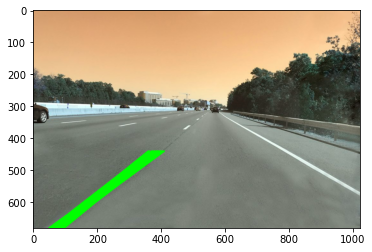

In [24]:
imgn = cv2.imread(im1_str)
leftpointsx = []
leftpointsy = []
rightpointsx = []
rightpointsy = []

for line in lines:
    x1, y1, x2, y2, x0, y0 = line
    m = (y2-y1)/(x2-x1)
    if m <= 1 and m >= 0.2:
#         rightpoints.append([x0, y0])
        rightpointsx.append(x1)
        rightpointsy.append(y1)
        rightpointsx.append(x2)
        rightpointsy.append(y2)
        cv2.line(imgn, (x1, y1), (x2, y2), (255, 0, 0), 3)
        
    elif m >= -1 and m <= -0.2:    
#         leftpoints.append([x0, y0])
        leftpointsx.append(x1)
        leftpointsy.append(y1)
        leftpointsx.append(x2)
        leftpointsy.append(y2)
        cv2.line(imgn, (x1, y1), (x2, y2), (0, 255, 0), 3)
        
plt.imshow(imgn)

In [25]:
def squaresum(lst):
    summ = 0
    for i in lst:
        summ += i*i
    return summ

def mean(lst):
    if len(lst) ==0:
        sys.exit()
    return sum(lst)/len(lst)

def linearregression(xvalues, yvalues, count):
    xavg = mean(xvalues)
    yavg = mean(yvalues)
    xysum = sum([a * b for a, b in zip(xvalues, yvalues)])
    slope = (xysum - count*xavg*yavg)/(squaresum(xvalues) - count*(xavg**2))
    intercept = yavg-slope*xavg
    return slope, intercept

In [26]:
imgn = cv2.imread(im1_str)
black = np.zeros((len(imgn), len(imgn[0])))
m, c= linearregression(leftpointsx, leftpointsy, len(leftpointsy))
print(m)
print(c)
x1 = round(len(imgn[0])/2 - 100)
y1 = round(x1*m+c)
x2 = 0
y2 = round(c)
print(f"{[x1, y1, x2, y2]}")
cv2.line(imgn, (x2, y2), (x1, y1), (0, 255, 0), 3)
cv2.line(black, (x2, y2), (x1, y1), (255, 0, 0), 3)

m, c = linearregression(rightpointsx, rightpointsy, len(rightpointsy))
print(m)
print(c)
x1 = round(len(imgn[0])/2 + 100)
y1 = round(x1*m+c)
x2 = round(len(imgn[0]))
y2 = round(x2*m+c)
print(f"{[x1, y1, x2, y2]}")
cv2.line(imgn, (x2, y2), (x1, y1), (255, 0, 0), 3)
cv2.line(black, (x2, y2), (x1, y1), (255, 0, 0), 3)


plt.imshow(imgn, cmap='gray')

-0.7561887323104397
734.5346126567409
[412, 423, 0, 735]


SystemExit: 

D:\ProgramFilesD\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
